# Coldpool and Downdraft Analysis for ARM Summer School 2025
Packages used: ARM ACT, metpy <br>
Contributers: <br>
Angel Chui (time series code) with support of Scott Giangrande, Max Grover, Scott Collis, and Joe O'Brien<br>
Scott Giangrande (QVP) using code from Mindy Deng. <br>
Scott Collis (QVP gatefilter)

In [1]:
import act
import pyart
import metpy
from metpy.units import units
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from netCDF4 import Dataset
import glob
import datetime
import pandas as pd
import matplotlib.dates as mdates
import os
import math
import calendar



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


# May 10 - Time Series

## pull kazr2 general mode data. 
Can use ACT for this because KAZR (RHI type) radar is not super huge file. The cone type ones (like SACR) are very large files and so would prefer to just pull individual files for those.

In [2]:
# Set your username and token here!
username = 'username'
token = 'token'

# Set the datastream and start/enddates
datastream = 'bnfkazr2cfrgeM1.a1'
startdate = '2025-05-10T03:00:00'
enddate = '2025-05-10T18:00:00' #notice can give date and time or leave it blank (like with start date)

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_kazr2 = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_kazr2 = act.io.read_arm_netcdf(result_kazr2)

[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.155959.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.045959.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.070001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.080001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.090001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.030000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.130000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.150000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.060002.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.100001.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.120000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.170002.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.110000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.140000.nc
[DOWNLOADING] bnfkazr2cfrgeM1.a1.20250510.035959.nc

If you use these data to prepare a publication, please cite:

Lindenmaier, I., Matthews, A., Wendler, T., Melo  de Castro, V., Deng, M.,
Rocque, M., & Feng, Y.-C. Ka ARM Zenith Radar (KAZR2CFRGE), 2025-05-10 to
2025-05-

## pull MET data 
in order to calculate theta-e using metpy

In [3]:
# pull in met data using ACT
# Set your username and token here!
username = 'username'
token = 'token'

# Set the datastream and start/enddates
datastream = 'bnfmetM1.b1'
startdate = '2025-05-10'
enddate = '2025-05-10T23:59:59' #notice can give date and time or leave it blank (like with start date)

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_met = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_met = act.io.read_arm_netcdf(result_met)
ds_met

[DOWNLOADING] bnfmetM1.b1.20250510.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET), 2025-05-10 to 2025-05-10, Bankhead National Forest, AL, USA; Long-term
Mobile Facility (BNF), Bankhead National Forest, AL, AMF3 (Main Site) (M1).
Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1786358



<xarray.Dataset> Size: 340kB
Dimensions:                       (time: 1440, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 12kB 2025-05-10 ... 2...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     datetime64[ns] 8B 2025-05-10
    time_offset                   (time) datetime64[ns] 12kB 2025-05-10 ... 2...
    time_bounds                   (time, bound) object 23kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    atmos_pressure                (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           float32 4B ...
    lon                           float32 4B ...
    alt                           float32 4B ...
Attributes: (12/26)
    command_line:                met_ingest -s bnf -f M1 --max-runtime 0
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.56-0.el9
    dod_version:                 met-b1-7.6
    input_source:                /data/collection/bnf/bnfmetM1.00/M1_MET_Tabl...
    site_id:                     bnf
    ...                          ...
    tbrg_precip_corr_info:       0.001000 * tbrg_precip_total^2 + 0.883000 * ...
    history:                     created by user armflowprod on machine prod-...
    _file_dates:                 ['20250510']
    _file_times:                 ['000000']
    _datastream:                 bnfmetM1.b1
    _arm_standards_flag:         1

## pull Radar Wind Profiler (rwp)
for wind average

In [4]:
# pull in met data using ACT
# Set your username and token here!
username = 'username'
token = 'token'

# Set the datastream and start/enddates
datastream = 'bnf915rwpwindavgM1.a1'
startdate = '2025-05-10'
enddate = '2025-05-10T23:59:59' #notice can give date and time or leave it blank (like with start date)

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_rwp = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_rwp = act.io.read_arm_netcdf(result_rwp)
ds_rwp

[DOWNLOADING] bnf915rwpwindavgM1.a1.20250510.000000.nc

If you use these data to prepare a publication, please cite:

Muradyan, P., & Ermold, B. Radar Wind Profiler (915RWPWINDAVG), 2025-05-10 to
2025-05-10, Bankhead National Forest, AL, USA; Long-term Mobile Facility (BNF),
Bankhead National Forest, AL, AMF3 (Main Site) (M1). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1572183



<xarray.Dataset> Size: 676kB
Dimensions:                       (time: 24, bound: 2, mode: 2, level: 135,
                                   beam: 3)
Coordinates:
  * time                          (time) datetime64[ns] 192B 2025-05-10 ... 2...
Dimensions without coordinates: bound, mode, level, beam
Data variables: (12/35)
    base_time                     datetime64[ns] 8B 2025-05-10
    time_offset                   (time) datetime64[ns] 192B 2025-05-10 ... 2...
    time_bounds                   (time, bound) object 384B dask.array<chunksize=(24, 2), meta=np.ndarray>
    mode_name                     (mode) |S10 20B dask.array<chunksize=(2,), meta=np.ndarray>
    mode_number                   (mode) int32 8B dask.array<chunksize=(2,), meta=np.ndarray>
    transmit_power_level_setting  (mode) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                            ...
    radial_velocity_power         (time, mode, beam, level) float32 78kB dask.array<chunksize=(24, 2, 3, 135), meta=np.ndarray>
    radial_velocity_snr           (time, mode, beam, level) float32 78kB dask.array<chunksize=(24, 2, 3, 135), meta=np.ndarray>
    radial_velocity_width         (time, mode, beam, level) float32 78kB dask.array<chunksize=(24, 2, 3, 135), meta=np.ndarray>
    lat                           float32 4B ...
    lon                           float32 4B ...
    alt                           float32 4B ...
Attributes: (12/20)
    command_line:          rwp_ingest -n 915rwp -s bnf -f M1
    Conventions:           ARM-1.2
    process_version:       ingest-rwp-11.9-1.el7
    dod_version:           915rwpwindavg-a1-1.0
    input_source:          /data/collection/bnf/bnf915rwpM1.00/w2025-05-10-00...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1572183
    history:               created by user dsmgr on machine prod-proc4.adc.ar...
    _file_dates:           ['20250510']
    _file_times:           ['000000']
    _datastream:           bnf915rwpwindavgM1.a1
    _arm_standards_flag:   1

## calculate theta-e
a good indicator of cold pool

In [5]:
# two ways to calculate theta-e: 1) pull maws data dewpoint temp and combine time or 2) calculate dewpoint temp from RH in the met data
# method 2) is better because method 1) will cause loss of resolution

# 1) to calculate theta-e, need met and maws data but by looking at the time from above you can see the time is slightly off, both are 1 min but maws if at 4 sec into the minute
# ds_combined = xr.merge([ds_met.resample(time='1min').nearest(), ds_maws.resample(time='1min').nearest()], compat='override')
# thetae = metpy.calc.equivalent_potential_temperature(ds_combined.atmos_pressure, ds_combined.temp_mean, ds_combined.atmospheric_dew_point)

# 2) 
dewpt_temp = metpy.calc.dewpoint_from_relative_humidity(ds_met.temp_mean, ds_met.rh_mean)
thetaeK = metpy.calc.equivalent_potential_temperature(ds_met.atmos_pressure, ds_met.temp_mean, dewpt_temp)
thetaeC = thetaeK - 273.15*units.kelvin

## calculating theta-e already sliced to the time frame we want
# dewpt_temp = metpy.calc.dewpoint_from_relative_humidity(ds_met.sel(time=slice("2025-05-10T03:00:00", "2025-05-10T18:00:00")).temp_mean, ds_met.sel(time=slice("2025-05-10T03:00:00", "2025-05-10T18:00:00")).rh_mean)
# thetaeK = metpy.calc.equivalent_potential_temperature(ds_met.sel(time=slice("2025-05-10T03:00:00", "2025-05-10T18:00:00")).atmos_pressure, ds_met.sel(time=slice("2025-05-10T03:00:00", "2025-05-10T18:00:00")).temp_mean, dewpt_temp)
# thetaeC = thetaeK - 273.15*units.kelvin

# Quasi Vertical Profile
code modified by Scott Giangrande, original code by Mindy Deng

In [6]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [7]:
def calculate_elevation_angle_array(height: np.ndarray, range_: np.ndarray) -> np.ndarray:
    """Returns an array of elevation angles in degrees."""
    return np.degrees(np.arctan2(height, range_))

### To make a CVP need to gatefilter certain azimuths

In [8]:
##Get Azimuths
#azmth = csapr.azimuth['data']

#Make this into the same shape as our radar field data
#azmth_square = np.repeat(np.expand_dims(azmth, 1), len(csapr.range['data']), axis=1)

#add the field
#csapr.add_field_like('reflectivity', 'azsq', azmth_square)

#Make a gate filter
#mygf = gatefilter = pyart.correct.GateFilter(csapr)

#filter on aziumth, 10 to 20 degrees
#mygf.exclude_outside('azsq', 10,20) 

#See what we got
#myd = pyart.graph.RadarDisplay(csapr)
#myd.plot_ppi('reflectivity', gatefilter = mygf)

# Plot QVP, RHI, MET together

## QVP calculation

In [32]:
## QVP part

# def plot_qvp_3variables(qvp_dbzs, qvp_zdrs,qvp_rhos,dtimes, hgt,el, case,htop,qvp_dir):
def plot_qvp_5variables(qvp_dbzs, qvp_vels, qvp_wths, qvp_zdrs,qvp_rhos,dtimes, hgt,el, case,htop,qvp_dir):
    
    # # Ensure dtimes is np.array of datetime
    # if isinstance(dtimes, list):
    #     dtimes = np.array(dtimes)
    
    # # Fix dimensions for pcolormesh
    # if dtimes.ndim == 1:
    #     dtimes = np.tile(dtimes, (new_dbzs.shape[0], 1))
    
    # # Check datetime format
    # assert np.issubdtype(dtimes.dtype, np.datetime64) or isinstance(dtimes[0, 0], datetime.datetime)
    
    # # Ensure start_time and end_time are datetime
    # if isinstance(start_time, str):
    #     start_time = datetime.datetime.fromisoformat(start_time)
    # if isinstance(end_time, str):
    #     end_time = datetime.datetime.fromisoformat(end_time)
    
    # Transpose and convert to arrays
    new_dbzs = np.array(qvp_dbzs).T
    new_zdrs = np.array(qvp_zdrs).T
    new_rhos = np.array(qvp_rhos).T
    new_vels = np.array(qvp_vels).T
    new_wths = np.array(qvp_wths).T
    
    # Apply RhoHV mask
    mask = new_rhos < 0.2
    new_dbzs[mask] = np.nan
    new_zdrs[mask] = np.nan
    new_rhos[mask] = np.nan
    new_vels[mask] = np.nan
    new_wths[mask] = np.nan
    
    # Setup plot
    ytop = htop
    fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,8))
    fig.subplots_adjust(hspace=0.3)
    
    # Plot Reflectivity
    #pcm = axes[0].pcolormesh(dtimes, hgt / 1e3, new_dbzs, vmin=-40, vmax=40, cmap='HomeyerRainbow')
    pcm = axes[0].pcolormesh(dtimes, hgt / 1e3, new_dbzs, vmin=-40, vmax=40, cmap='ChaseSpectral')
    fig.colorbar(pcm, ax=axes[0], label='[dBZ]')
    axes[0].set_ylim(0, ytop)
    axes[0].set_title('Reflectivity')
    axes[0].set_ylabel('height [km]')
    
    # Plot Velocity
    pcm = axes[1].pcolormesh(dtimes, hgt / 1e3, new_vels, vmin=-5, vmax=5, cmap='Spectral_r')
    fig.colorbar(pcm, ax=axes[1], label='[m/s]')
    axes[1].set_ylim(0, ytop)
    axes[1].set_title('Vd')
    axes[1].set_ylabel('height [km]')
    
    # Plot Width
    pcm = axes[2].pcolormesh(dtimes, hgt / 1e3, new_wths, vmin=0, vmax=3, cmap='Spectral_r')
    fig.colorbar(pcm, ax=axes[2], label='[m/s]')
    axes[2].set_ylim(0, ytop)
    axes[2].set_title('Width')
    axes[2].set_ylabel('height [km]')
    
    # Plot ZDR
    #pcm = axes[3].pcolormesh(dtimes, hgt / 1e3, new_zdrs, vmin=-2, vmax=4, cmap='Spectral_r')
    pcm = axes[3].pcolormesh(dtimes, hgt / 1e3, new_zdrs, vmin=-2, vmax=4, cmap='ChaseSpectral')
    fig.colorbar(pcm, ax=axes[3], label='[dB]')
    axes[3].set_ylim(0, ytop)
    axes[3].set_title('ZDR')
    axes[3].set_ylabel('height [km]')
    
    # Plot RhoHV
    pcm = axes[4].pcolormesh(dtimes, hgt / 1e3, new_rhos, vmin=0, vmax=1, cmap='Spectral_r')
    fig.colorbar(pcm, ax=axes[4])
    axes[4].set_ylim(0, ytop)
    axes[4].set_title('RhoHV')
    axes[4].set_ylabel('height [km]')
    axes[4].set_xlabel('Time [UTC] on ' + str(case))
    # axes[2].set_xlim([start_time, end_time])
    axes[4].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    # axes[4].set_xlim([dtimes.min(), dtimes.max()])
    # axes[4].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    # Add main title
    plt.suptitle(f'BNF XSACR QVPs at {el} deg and 40deg sector for {case}')
   
    # Optional save
     
    #save_gif = qvp_dir + f'bnf_xsacr_qvp_{el}deg_{case}.png'
    #save_gif = qvp_dir + f'bnf_xsacr_qvp_{el}deg_{case}htop_{htop}.png'
    #plt.savefig(save_gif , dpi=400, bbox_inches="tight")
    plt.show()

qvp_dir =  '/data/home/mdeng/data/bnf/qvp/xsacr/' 
#os.makedirs(qvp_dir, exist_ok=True)

#dir = '/data/datastream/bnf/bnfxsacrcfrS4.a1/'
#afile =  dir + 'bnfxsacrcfrS4.a1.20250514.225456.nc'

dir = "data/project/ARM_Summer_School_2025/radar/xsacr/*" 
#afile =  dir + 'bnfxsacrcfrS4.a1.202505.225456.nc'


#el = 9
el = 16

#azimuth range for a CVP
az1 = 200
az2 = 240

yr = "2025"
month = '05'
day = '10'
date_join = f"{yr}-{month}-{day}"
case = yr + month + day

files = sorted(glob.glob('/data/project/ARM_Summer_School_2025/radar/xsacr/bnfxsacrcfrS4.a1.'+case+'*'))
#files = sorted(glob.glob('/data/datastream/bnf/bnfkasacrcfrS4.a1/bnfkasacrcfrS4.a1.'+case+'*'))

nfiles = len(files)

qvp_dbzs = []
qvp_zdrs = []
qvp_rhos = []
qvp_vels = []
qvp_wths = []
dtimes = []



for file in files:
    rad = pyart.io.read(file)
    #print(file)

    
    if rad.scan_type == 'ppi':
       

        #find azimuths for XSACR file
        azmth = rad.azimuth['data']
        
        #Make this into the same shape as our radar field data
        azmth_square = np.repeat(np.expand_dims(azmth, 1), len(rad.range['data']), axis=1)
        rad.add_field_like('reflectivity', 'azsq', azmth_square)
 
        # #Make a gate filter
        mygf = gatefilter = pyart.correct.GateFilter(rad)
        
        #filter on aziumth, az1 to az2 degrees
        mygf.exclude_outside('azsq', az1,az2) 


        
        #qvp = pyart.retrieve.quasi_vertical_profile(rad, desired_angle=el)
        qvp = pyart.retrieve.quasi_vertical_profile(rad, desired_angle=el, gatefilter= mygf)
        rng = qvp['range']
        hgt = qvp['height']

        angle = calculate_elevation_angle_array(hgt, rng)
        angle_mean = np.mean(angle)
        d_angle  = np.abs(angle_mean - el)
        if  d_angle  < 1:
          
            qdbz = qvp['reflectivity']
            # qdbz = qvp['attenuation_corrected_reflectivity_h'] # for csapr
            qvel = qvp['mean_doppler_velocity']
            qwth = qvp['spectral_width']
            
            qzdr = qvp['differential_reflectivity']
            qrho = qvp['copol_correlation_coeff']

            rng0 = qvp['range']
            hgt0 = qvp['height']
        
            qvp_dbzs.append(qdbz)
            qvp_zdrs.append(qzdr)
            qvp_rhos.append(qrho)
            qvp_vels.append(qvel)
            qvp_wths.append(qwth)
    
            #date = os.path.basename(files[i])[18:-3]
            date = os.path.basename(file)[18:-3]
            dto = datetime.datetime.strptime(date, '%Y%m%d.%H%M%S')
            dtimes.append(dto)
            
            #print ('done with ' + file)


rng_corr = rng*np.tan(np.deg2rad(el))

# Define the time limits 
start_time = np.datetime64(date_join+"T03:00:00")
end_time = np.datetime64(date_join+"T18:00:00")

[1.4996567 2.4884412 3.504692  4.493477 ]
4.493477
[ 6.998398  9.997711 13.399661 12.997025 16.996109]
16.990616
[1.4941634 2.4994278 3.499199  4.493477 ]
4.493477
[ 6.9929047  9.997711  12.997025  16.996109 ]
16.996109
[1.4996567 2.4994278 3.4937057 4.49897  ]
4.493477
[ 6.9929047  9.992218  12.997025  16.996109 ]
16.991806
[1.4886702 2.4995184 3.4937057 4.49897  ]
4.493477
[ 6.998398  9.997711 12.997025 16.996109]
16.996109
[1.4996567 2.4939346 3.504692  4.493477 ]
4.493477
[ 6.998398  9.997711 12.997025 16.996109]
16.996109
[1.4886702 2.4994278 3.4948554 4.493477 ]
4.493477
[ 6.9929047  9.992218  12.997025  16.990616 ]
16.996109
[1.4886702 2.4994278 3.499199  4.493477 ]
4.493477
[ 6.9929047  9.997711  12.997025  16.994118 ]
16.996109
[1.4941634 2.4994278 3.4937057 4.493477 ]
4.493477
[ 6.998398  9.997711 12.997025 16.990122]
16.996109
[1.4941634 2.4950006 3.504692  4.493477 ]
4.493477
[ 6.998398  9.997711 12.997025 16.996109]
16.996109
[1.4996567 2.4994278 3.504692  4.493477 ]
4.493

## plot RHI and MET on top of the QVP plots

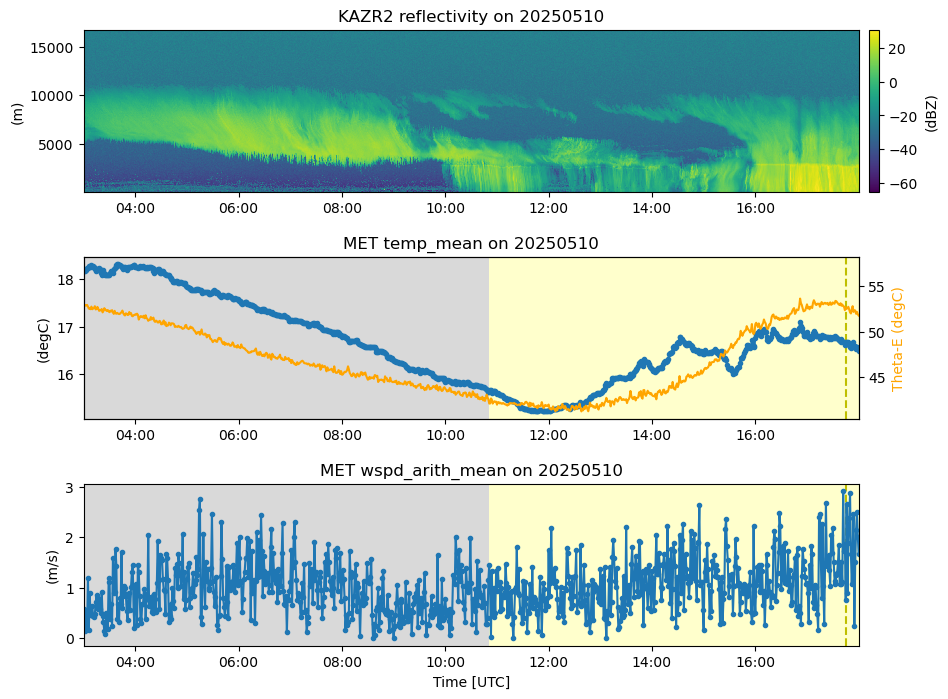

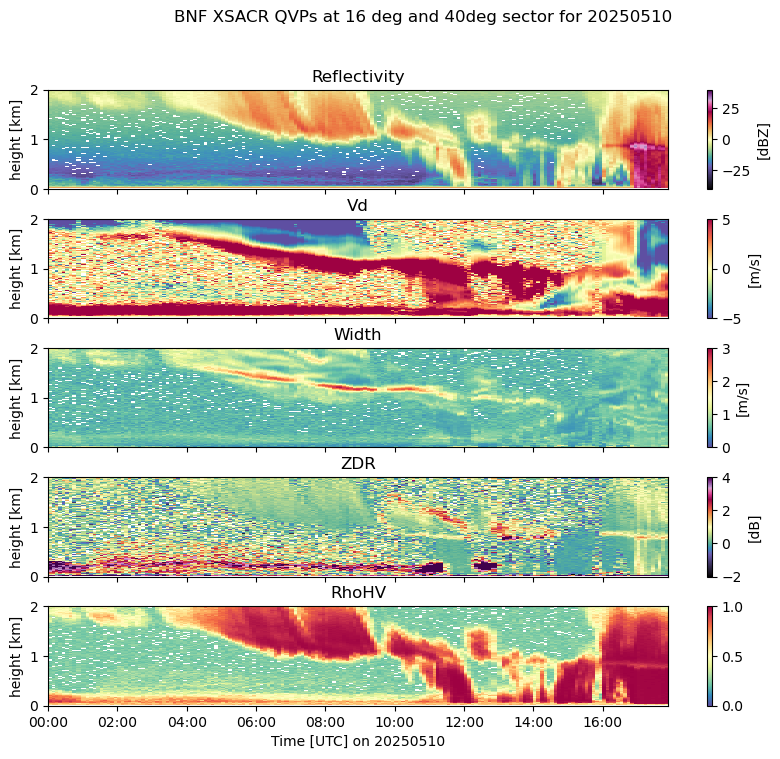

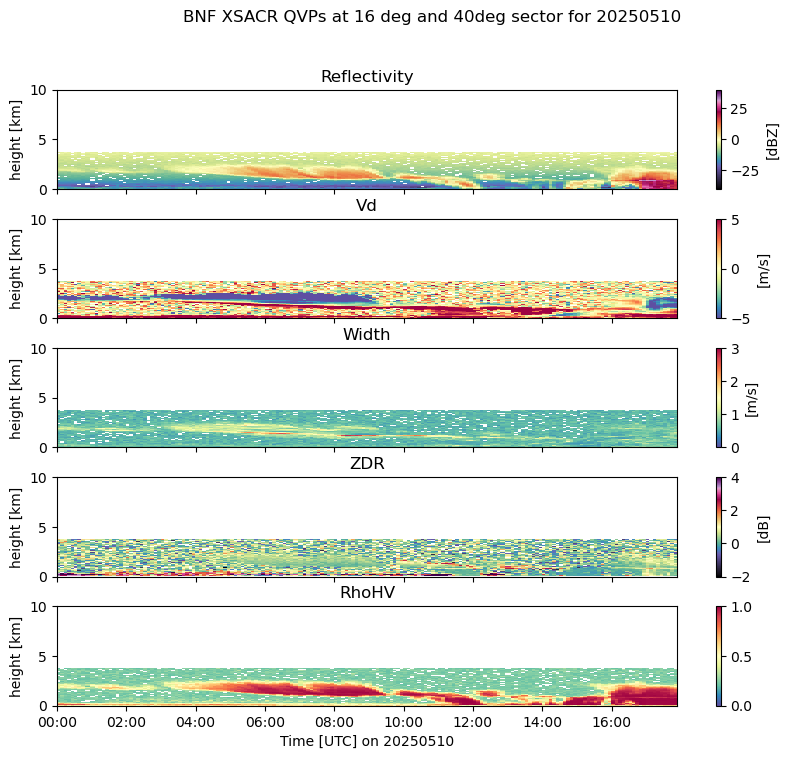

In [33]:
# Create a plotting display object with 3 plots
combined = act.plotting.TimeSeriesDisplay({'KAZR2': ds_kazr2.sel(time=slice("2025-05-10T03:00:00","2025-05-10T18:00:00")), 'MET': ds_met.sel(time=slice("2025-05-10T03:00:00","2025-05-10T18:00:00")), 'MET' : ds_met.sel(time=slice("2025-05-10T03:00:00","2025-05-10T18:00:00"))}, figsize=(10,8), subplot_shape=(3,))
plt.subplots_adjust(hspace=0.4)

# top (first) subplot (index of 0)
combined.plot('reflectivity', dsname='KAZR2', subplot_index=(0,))

# middle (second) subplot (index of 1)
# Plot up the MET temperature and theta-e (calculated from met mean temp and RH)
combined.plot('temp_mean', dsname='MET', subplot_index=(1,))
ax2 = combined.axes[1].twinx() #copies the x axis onto both plots
ax2.plot(ds_met.time, thetaeC, color='orange')
ax2.set_ylabel('Theta-E (degC)', color='orange')

# bottom (third) subplot (index of 2)
# plot MET wind data time series
combined.plot('wspd_arith_mean', dsname='MET', subplot_index=(2,))


# Plot up a day/night background
combined.day_night_background(dsname='MET', subplot_index=(1,))
combined.day_night_background(dsname='MET', subplot_index=(2,))

# save figure
plt.savefig('/data/home/abchui/bnf-deep-convection/notebooks/plots/RHI_MET.png', dpi=400, bbox_inches="tight")

## QVP plots =================================
# plot with max height 2 km
htop = 2
plot_qvp_5variables(qvp_dbzs, qvp_vels, qvp_wths, qvp_zdrs,qvp_rhos,dtimes, hgt,el, case,htop,qvp_dir)
# plot_qvp_3variables(qvp_dbzs,qvp_zdrs,qvp_rhos,dtimes, hgt0,el, case,htop, qvp_dir)

# plot with max height 10 km
htop = 10
plot_qvp_5variables(qvp_dbzs, qvp_vels, qvp_wths, qvp_zdrs,qvp_rhos,dtimes, hgt,el, case,htop,qvp_dir)
# plot_qvp_3variables(qvp_dbzs,qvp_zdrs,qvp_rhos,dtimes, hgt0,el, case,htop, qvp_dir)


plt.show()



In [80]:
def plot_qvp_3variables(qvp_dbzs, qvp_zdrs, qvp_rhos, dtimes, hgt, htop, axes, row_offset):
    new_dbzs = np.array(qvp_dbzs).T
    new_zdrs = np.array(qvp_zdrs).T
    new_rhos = np.array(qvp_rhos).T

    # Apply masking
    mask = new_rhos < 0.2
    new_dbzs[mask] = np.nan
    new_zdrs[mask] = np.nan
    new_rhos[mask] = np.nan

    labels = ['Reflectivity [dBZ]', 'ZDR [dB]', 'RhoHV']
    cmaps = ['ChaseSpectral', 'ChaseSpectral', 'Spectral_r']
    data = [new_dbzs, new_zdrs, new_rhos]
    vmin = [-40, -2, 0]
    vmax = [40, 4, 1]

    for i in range(3):
        ax = axes[row_offset + i]
        pcm = ax.pcolormesh(dtimes, hgt / 1e3, data[i], vmin=vmin[i], vmax=vmax[i], cmap=cmaps[i])
        plt.colorbar(pcm, ax=ax, label=labels[i])
        ax.set_ylim(0, htop)
        ax.set_ylabel("Height [km]")
        ax.set_title(f"{labels[i]} (max height {htop} km)")
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.set_xlabel('Time [UTC]')


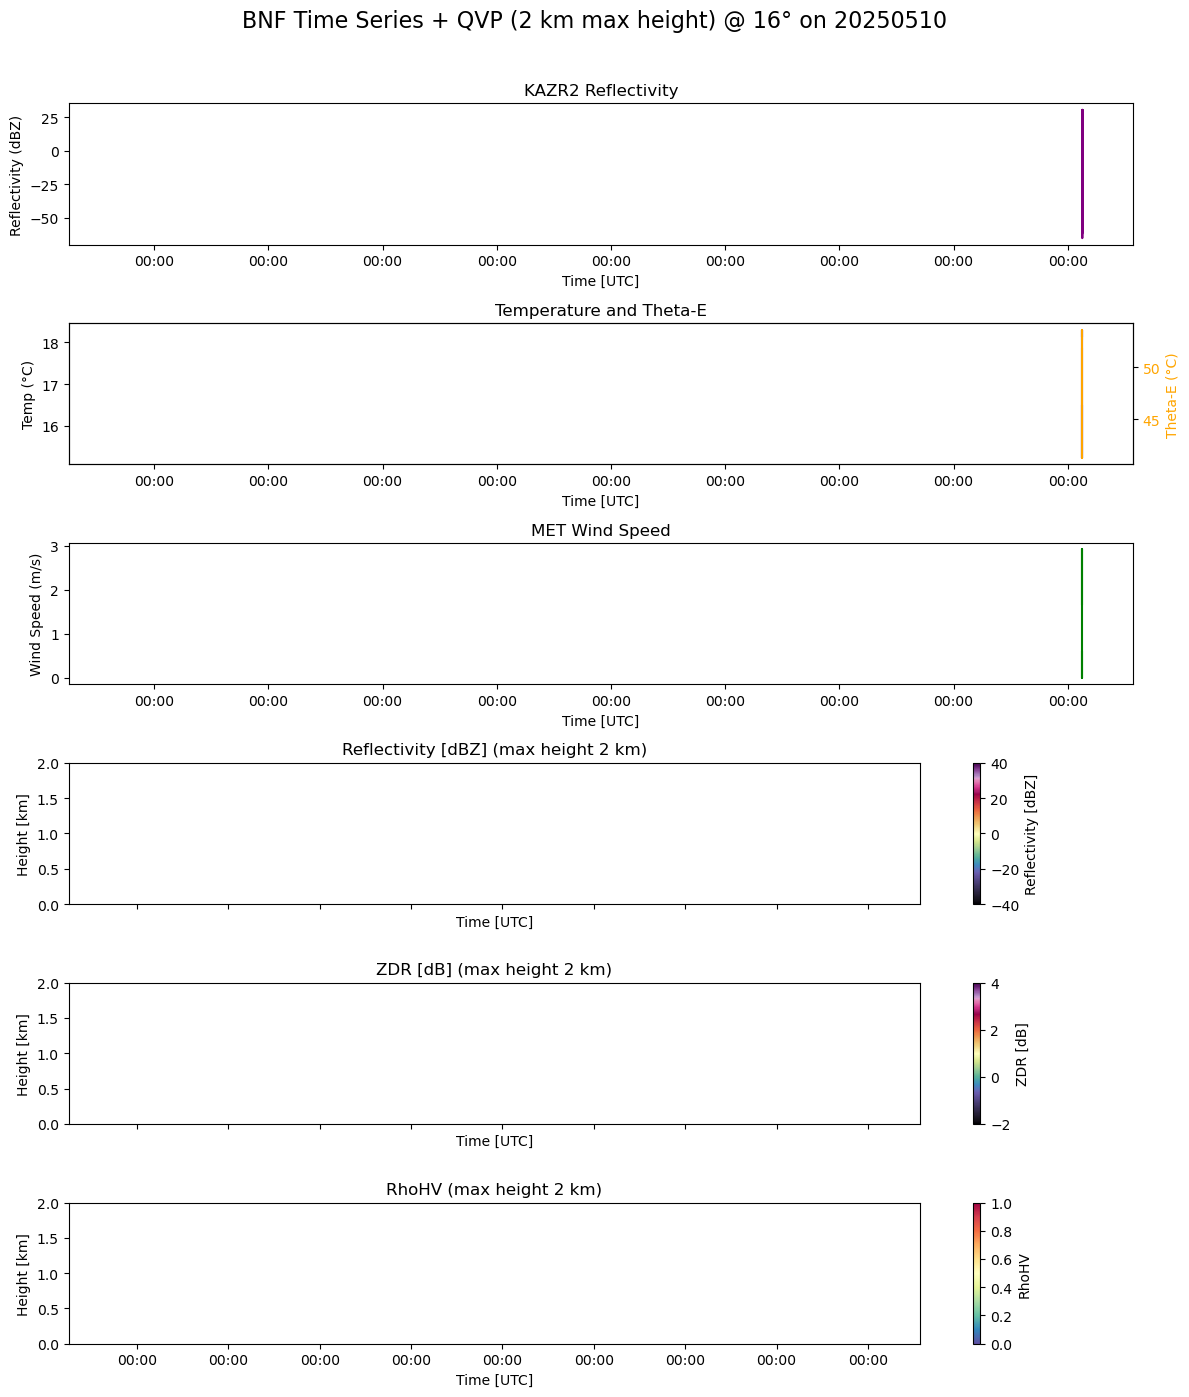

In [87]:
fig, axes = plt.subplots(6, 1, figsize=(12, 14), sharex=True)
fig.subplots_adjust(hspace=0.6)

# --- ACT PLOTS ---
ds_kazr2_sel = ds_kazr2.sel(time=slice("2025-05-10T03:00:00", "2025-05-10T18:00:00"))
ds_met_sel = ds_met.sel(time=slice("2025-05-10T03:00:00", "2025-05-10T18:00:00"))

axes[0].plot(ds_kazr2_sel.time, ds_kazr2_sel['reflectivity'], color='purple')
axes[0].set_ylabel('Reflectivity (dBZ)')
axes[0].set_title('KAZR2 Reflectivity')

axes[1].plot(ds_met_sel.time, ds_met_sel['temp_mean'], label='Temp (°C)', color='blue')
ax1b = axes[1].twinx()
ax1b.plot(ds_met_sel.time, thetaeC, label='Theta-E (°C)', color='orange')
axes[1].set_ylabel('Temp (°C)')
ax1b.set_ylabel('Theta-E (°C)', color='orange')
ax1b.tick_params(axis='y', labelcolor='orange')
axes[1].set_title('Temperature and Theta-E')

axes[2].plot(ds_met_sel.time, ds_met_sel['wspd_arith_mean'], color='green')
axes[2].set_ylabel('Wind Speed (m/s)')
axes[2].set_title('MET Wind Speed')

for i in range(3):
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[i].tick_params(labelbottom=True)
    axes[i].set_xlabel('Time [UTC]')

# --- QVP (htop = 2 km) ---
plot_qvp_3variables(qvp_dbzs, qvp_zdrs, qvp_rhos, dtimes, hgt0, htop=2, axes=axes, row_offset=3)

fig.suptitle(f"BNF Time Series + QVP (2 km max height) @ {el}° on {case}", fontsize=16, y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig(f"{qvp_dir}/bnf_combined_qvp2km_timeseries_{el}deg_{case}.png", dpi=300, bbox_inches="tight")
plt.show()


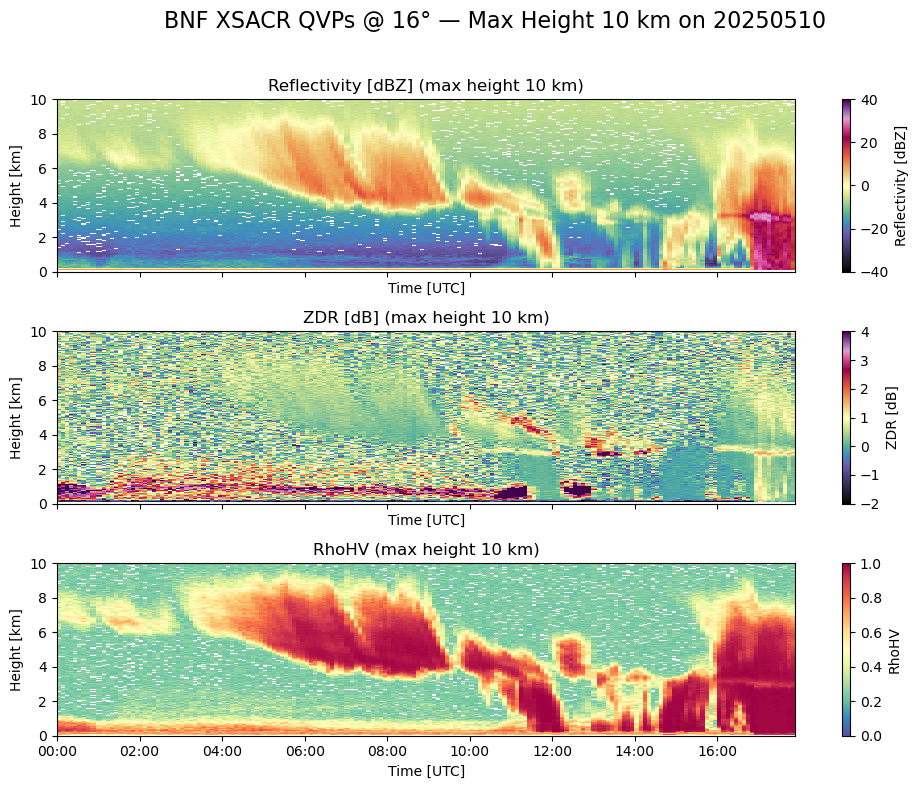

In [88]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
fig.subplots_adjust(hspace=0.4)

plot_qvp_3variables(qvp_dbzs, qvp_zdrs, qvp_rhos, dtimes, hgt0, htop=10, axes=axes, row_offset=0)

fig.suptitle(f"BNF XSACR QVPs @ {el}° — Max Height 10 km on {case}", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig(f"{qvp_dir}/bnf_qvp10km_{el}deg_{case}.png", dpi=300, bbox_inches="tight")
plt.show()
